# **HR analsis**

In [34]:
import pandas as pd
import numpy as np

In [35]:
credit_df = pd.read_csv( "https://raw.githubusercontent.com/sravanirachamalla/MLA2021/main/Logistic%20Regression/Exercise/HR_comma_sep.csv" )
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [39]:
credit_df.iloc[0:10,0:8]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
5,0.41,0.50,2,153,3,0,1,0
6,0.10,0.77,6,247,4,0,1,0
7,0.92,0.85,5,259,5,0,1,0
8,0.89,1.00,5,224,5,0,1,0
9,0.42,0.53,2,142,3,0,1,0


In [37]:
credit_df.iloc[0:10,8:]

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
5,sales,low
6,sales,low
7,sales,low
8,sales,low
9,sales,low


In [40]:
credit_df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [41]:
X_features = list( credit_df.columns )
X_features.remove( 'left' )
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department',
 'salary']

**Encoding Categorical Features**

In [42]:
encoded_credit_df = pd.get_dummies( credit_df[X_features],
drop_first = True )

In [43]:
list(encoded_credit_df.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical',
 'salary_low',
 'salary_medium']

In [47]:
encoded_credit_df[['salary_low',
'salary_medium']].head(10)

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [49]:
import statsmodels.api as sm
Y = credit_df.left
X = sm.add_constant( encoded_credit_df )

**Splitting into Train and Validation Sets**

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 42)

**Building Logistic Regression Model**

In [51]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.425451
         Iterations 7


**Printing Model Summary**

In [52]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                 Logit              Pseudo R-squared:   0.225    
Dependent Variable:    left               AIC:                8971.6245
Date:                  2021-09-01 05:21   BIC:                9109.5462
No. Observations:      10499              Log-Likelihood:     -4466.8  
Df Model:              18                 LL-Null:            -5761.7  
Df Residuals:          10480              LLR p-value:        0.0000   
Converged:             1.0000             Scale:              1.0000   
No. Iterations:        7.0000                                          
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                  -1.7951   0.2307  -7.7818 0.0000 -2.2473 -1.3430
satisfaction_level     -4.1857   0.1173 -35.6847 0.0000 -4.4156 -3.9558
last_evaluation         0.6297   0.1787   3.5234 0.0004  0.2794  0.9800
number_project         -0.3019   0.0254 -11.8800 0.0000 -0.3517 -0.2521
average_montly_hours    0.0048   0.0006   7.7658 0.0000  0.0036  0.0060
time_spend_company      0.2678   0.0187  14.3073 0.0000  0.2311  0.3044
Work_accident          -1.5018   0.1056 -14.2198 0.0000 -1.7088 -1.2948
promotion_last_5years  -1.3485   0.3021  -4.4634 0.0000 -1.9406 -0.7563
Department_RandD       -0.5820   0.1668  -3.4883 0.0005 -0.9090 -0.2550
Department_accounting   0.2244   0.1465   1.5312 0.1257 -0.0628  0.5116
Department_hr           0.4455   0.1478   3.0135 0.0026  0.1557  0.7352
Department_management  -0.2483   0.1773  -1.4010 0.1612 -0.5957  0.0991
Department_marketing    0.2629   0.1469   1.7891 0.0736 -0.0251  0.5509
Department_product_mng  0.1162   0.1402   0.8283 0.4075 -0.1587  0.3910
Department_sales        0.1571   0.1070   1.4682 0.1421 -0.0526  0.3669
Department_support      0.1707   0.1173   1.4552 0.1456 -0.0592  0.4006
Department_technical    0.2641   0.1129   2.3380 0.0194  0.0427  0.4855
salary_low              2.0546   0.1596  12.8731 0.0000  1.7418  2.3674
salary_medium           1.5342   0.1603   9.5677 0.0000  1.2199  1.8484
=======================================================================

"""

**Model Dignostics**

In [53]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [54]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['const',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department_RandD',
 'Department_hr',
 'Department_technical',
 'salary_low',
 'salary_medium']

In [55]:
final_logit = sm.Logit( y_train,
sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.425996
         Iterations 7


In [56]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit              Pseudo R-squared:   0.224    
Dependent Variable:   left               AIC:                8971.0718
Date:                 2021-09-01 05:22   BIC:                9065.4393
No. Observations:     10499              Log-Likelihood:     -4472.5  
Df Model:             12                 LL-Null:            -5761.7  
Df Residuals:         10486              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.6976   0.2113  -8.0326 0.0000 -2.1118 -1.2834
satisfaction_level    -4.1884   0.1172 -35.7314 0.0000 -4.4181 -3.9587
last_evaluation        0.6231   0.1785   3.4905 0.0005  0.2732  0.9730
number_project        -0.3017   0.0254 -11.8856 0.0000 -0.3515 -0.2520
average_montly_hours   0.0048   0.0006   7.7795 0.0000  0.0036  0.0060
time_spend_company     0.2636   0.0185  14.2373 0.0000  0.2273  0.2999
Work_accident         -1.5019   0.1056 -14.2169 0.0000 -1.7090 -1.2949
promotion_last_5years -1.3769   0.3005  -4.5817 0.0000 -1.9660 -0.7879
Department_RandD      -0.7150   0.1407  -5.0830 0.0000 -0.9906 -0.4393
Department_hr          0.3120   0.1175   2.6548 0.0079  0.0817  0.5423
Department_technical   0.1302   0.0687   1.8960 0.0580 -0.0044  0.2648
salary_low             2.1139   0.1584  13.3427 0.0000  1.8034  2.4244
salary_medium          1.5889   0.1593   9.9755 0.0000  1.2767  1.9011
======================================================================

"""

**Predicting on Test Data**

In [57]:
y_pred_df = pd.DataFrame( { "actual": y_test,
"predicted_prob": final_logit.predict(
sm.add_constant( X_test[significant_vars] ) ) } )

In [60]:
y_pred_df.sample(15, random_state = 42)

,actual,predicted_prob,predicted
13995,0,0.007618,0
4442,0,0.273093,0
8091,0,0.170343,0
9822,0,0.034714,0
6151,0,0.404714,0
6282,0,0.039314,0
511,1,0.557681,1
11024,0,0.147946,0
3980,0,0.118936,0
4229,0,0.109096,0


In [62]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(15, random_state = 42)

,actual,predicted_prob,predicted
13995,0,0.007618,0
4442,0,0.273093,0
8091,0,0.170343,0
9822,0,0.034714,0
6151,0,0.404714,0
6282,0,0.039314,0
511,1,0.557681,1
11024,0,0.147946,0
3980,0,0.118936,0
4229,0,0.109096,0


**Creating a Confusion Matrix**

In [63]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [64]:
def draw_cm( actual, predicted ):
## Cret
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
                xticklabels = ["Bad credit", "Good Credit"] ,
                yticklabels = ["Bad credit", "Good Credit"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

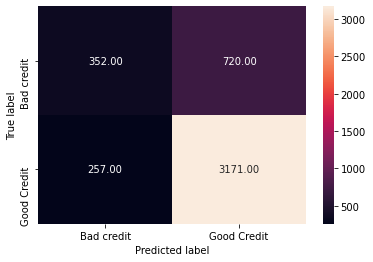

In [65]:
draw_cm( y_pred_df.actual,
y_pred_df.predicted )

**Measuring Accuracies**

In [66]:
print( metrics.classification_report( y_pred_df.actual,
y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3428
           1       0.58      0.33      0.42      1072

    accuracy                           0.78      4500
   macro avg       0.70      0.63      0.64      4500
weighted avg       0.76      0.78      0.76      4500



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


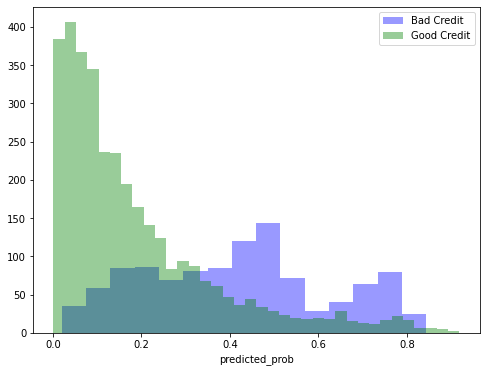

In [67]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"],
kde=False, color = 'b',
label = 'Bad Credit' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"],
kde=False, color = 'g',
label = 'Good Credit' )
plt.legend()
plt.show()

**ROC & AUC**

In [68]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

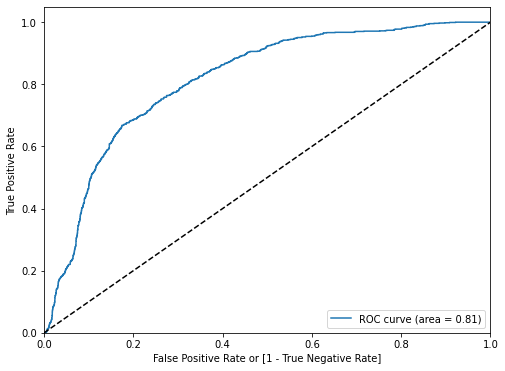

In [69]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,
y_pred_df.predicted_prob)

In [71]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,
y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

0.81

**Finding Optimal Cutoff**
 
 Youden's index

In [72]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,
                          'fpr': fpr,
                          'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
1155,0.667910,0.174446,0.320829,0.493465
1156,0.667910,0.174737,0.320782,0.493173
1157,0.667910,0.175029,0.320512,0.492881
1158,0.667910,0.175321,0.319931,0.492590
1172,0.671642,0.179405,0.317379,0.492237


In [73]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(
                                lambda x: 1 if x > 0.22 else 0)

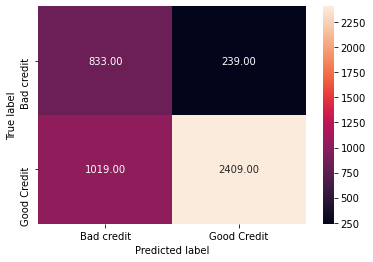

In [74]:
draw_cm( y_pred_df.actual,
        y_pred_df.predicted_new)

In [75]:
print(metrics.classification_report( y_pred_df.actual,
y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      3428
           1       0.45      0.78      0.57      1072

    accuracy                           0.72      4500
   macro avg       0.68      0.74      0.68      4500
weighted avg       0.80      0.72      0.74      4500

